# (1) 문제 상황 가정 및 데이터 전처리 | 광고 프로모션 효율 증진을 위한 커머스 고객 세분화 | 파이썬 머신러닝

이번 분석은 임의의 문제 상황을 가정하고 데이터를 통해 문제를 해결할 방법을 찾습니다. 의식적으로 '데이터'보다 '문제'에 더 집중하겠습니다. '문제'를 이해하면 데이터는 자연스럽게 눈에 들어옵니다. 특히 후반부에 집단 군집 분석을 진행할 텐데, 이를 위해 머신러닝도 사용해볼 예정입니다.

```
목차
___
Step 1. 문제 상황 가정 및 데이터 전처리 
     1-1. 라이브러리 호출 및 데이터 확인 
     1-2. 일부 컬럼 제거 
     1-3. 컬럼명, 데이터타입 형식 통일 
     1-4. 현재 날짜 가정 
     1-5. 이상치 처리
```

## 1. 문제 상황 가정 및 데이터 전처리 

지금부터 우리는 이커머스 스타트업의 데이터 분석가입니다. 상품이 많아지면서 사용자 수가 늘고 매출 규모는 늘어나고 있지만 최근에 고객들이 많이 이탈하고 있습니다. 이탈을 막기 위해 방안을 모색하던 중 상품 MD와 플랫폼 기획 쪽에서 서비스 개편이나 상품 수급 기준을 높이자는 의견이 나왔습니다. 하지만 우리가 볼 때 신규 유입자 수는 역대 최고치를 갱신하고 있기 때문에 서비스를 전면 개편하거나 유통업체를 바꾸는 시도는 하지 않는 것이 좋은 상황인 것 같습니다. 

대신 우리는 사용자 수가 기존 대비 가파르게 늘고 있지만 그간 광고 프로모션에는 큰 변화를 주지 않았기 때문에 본인의 소비 성향과 관련 없는 광고에 피로감을 느꼈다고 생각했습니다. 그래서 기존 고객들이 이탈하고 있는 이유를 서비스가 마음에 들지 않아서가 아니라 광고에 대한 피로감 때문이라는 가설을 세우고 프로모션 A/B 테스트를 통해 검증해보자는 의견을 냈습니다.

다행히 현업에서도 우리 의견에 공감하여 A/B 테스트 설계를 시작한 상황이다. 실험은 기존의 일괄적인 프로모션과 개인화된 프로모션으로 제작하고, 소비자 그룹을 무작위로 50:50으로 나눠 한쪽은 일괄 프로모션(A), 다른 한 쪽은 개인화 프로모션(B)을 적용할 것입니다. 이번 분석(광고 프로모션 효율 증진을 위한 커머스 고객 세분화)의 흐름은 개인화 프로모션(B)을 제작하기 전, 개인화(grouping) 기준을 설정해나가는 과정이 되겠습니다.

### 1-1. 라이브러리 호출 및 데이터 확인

여건상 캐글 사이트에서 데이터셋을 빌려오겠지만, 실무 상황을 가정하기 위해 데이터셋을 약간 조정할 것이고 조금은 부족한 데이터셋으로 고객 그룹을 나눠볼 예정입니다. 단, 데이터 양이 많지 않기 때문에(2240 rows) 결측치를 일부러 만들거나 하지는 않겠습니다. 데이터셋은 아래 링크에서 확보했습니다.
- [Customer Personality Analysis, Kaggle Dataset](https://www.kaggle.com/imakash3011/customer-personality-analysis)

In [2]:
# 데이터프레임
import pandas as pd

# 시간 계산
import datetime

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [3]:
# 'Tab' 구분자로 나뉜 csv 파일을 불러온다.
customer_df_r = pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')
customer_df_r.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


결측치와 데이터 타입을 살펴봅니다.

In [4]:
customer_df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

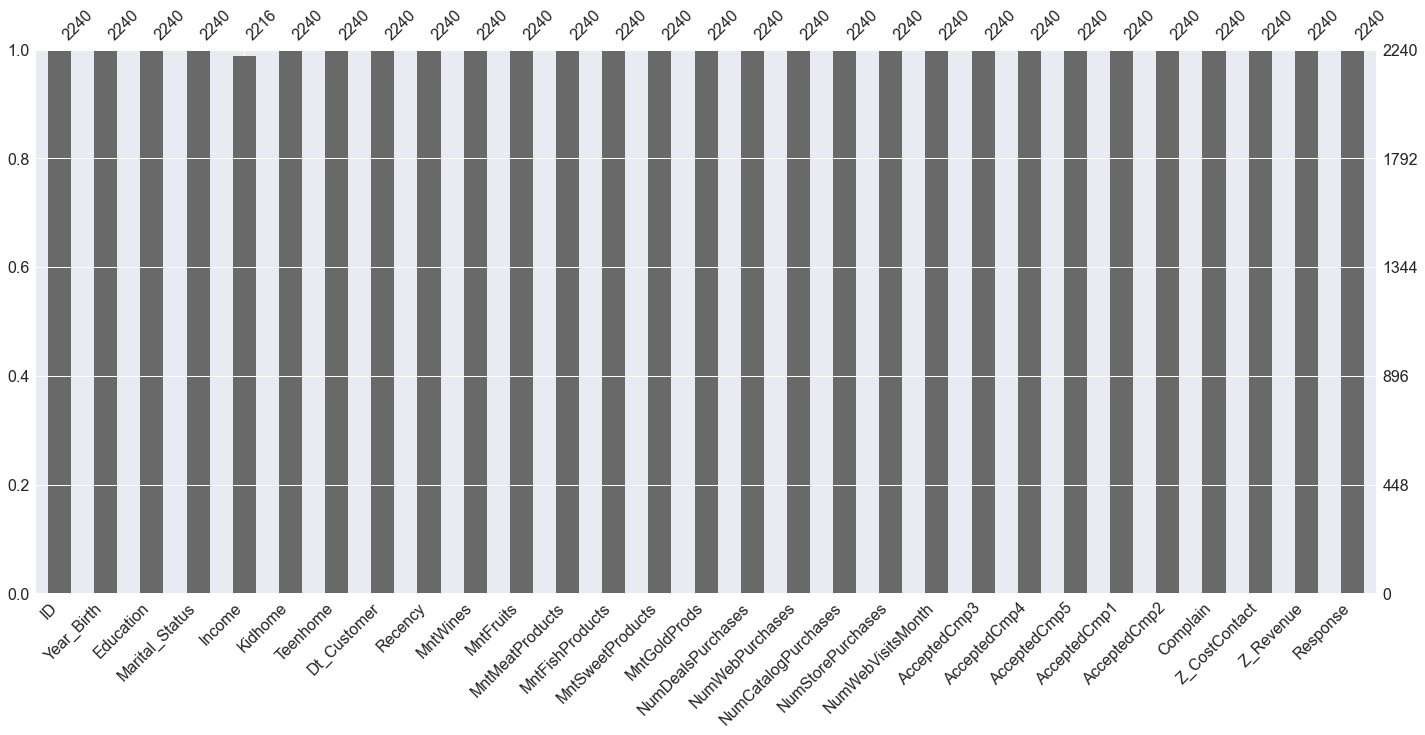

In [6]:
plt.style.use('seaborn')
msno.bar(customer_df_r)
plt.show()

Income 컬럼에만 결측가 보입니다. 조건식을 통해서도 체크할 수 있습니다.

In [139]:
# 전체 결측치와 Income 컬럼의 결측치 수를 비교. 일치하면 True 반환
customer_df_r.isnull().sum().sum() == customer_df_r['Income'].isnull().sum()

True

확인한 것처럼 전체 중 Income 컬럼에만 결측치가 존재하므로 해당 결측치만 적절히 처리해주고 분류 모델에 우겨넣으면 될 것 같습니다. 하지만 이보다 더 현실적인 상황을 만들어보겠습니다.

### 1-2. 일부 컬럼 제거

머신러닝은 이렇게 양질의 데이터와 독립적인 컬럼들이 많을 수록 성능이 좋습니다. 하지만 실무에서 질적인 조건이 좋기는 어렵습니다.

```
----------------------------------------------------------------------------------
People
----------------------------------------------------------------------------------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
----------------------------------------------------------------------------------
Products
----------------------------------------------------------------------------------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
----------------------------------------------------------------------------------
Promotion
----------------------------------------------------------------------------------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
----------------------------------------------------------------------------------
Place
----------------------------------------------------------------------------------
NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

여기서 어느 회사에나 있는 데이터는 다음과 같습니다.

- People 유형의 고객 ID, 출생연도(Year_Birth), 가입일(Dt_Customer), 가장 최근 구매일(Recency, 여기서는 구매 후 오늘까지 날짜로 저장되어 있습니다.), 클레임 수(Complain) 컬럼
- Promotion 유형의 모든 컬럼(할인 받고 구매한 상품 수와 프로모션에 대한 동의 여부)
- Place 유형의 모든 컬럼(다양한 홍보 채널의 구매 상품 수 관련)

이렇게 상품에 대한 정보, 구매 경로, 고객 가입 정보 등은 어느 업체나 매출 관리를 위해 보유하고 있습니다. 
반면 아래 컬럼들은 설문과 같은 임의의 특정 방식으로 수집하지 않는다면 보유하기 어렵습니다.

- People 유형의 교육 수준(Education), 결혼 여부(Marital_Status), 소득 수준(Income), 10세 미만 자녀 수(Kidhome), 10대 자녀 수(Teenhome)
- Products 유형의 모든 컬럼(고객이 1년에 어떤 제품을 얼마나 소비하는지 여부, 이 데이터는 소비는 자사 제품의 구매 내역이 아닌 개인 소비 성향에 대한 답변으로 확보된 것으로 보이네요.)

우리는 일반적인 회사에 기본적으로 수집하고 있을 법한 데이터만 분석에 사용할 것입니다. 따라서 사용하지 않을 컬럼들을 모두 소거해주고 Z_CostContact와 Z_Revenue컬럼은 그 의미가 불분명해 역시 소거하겠습니다.


In [7]:
# 혹시 중요한 컬럼이 있을지 모르니 원본은 남겨두고 다른 변수에 새롭게 할당하여 사용한다.
customer_df = customer_df_r.drop(columns=['Education','Marital_Status','Income','Kidhome','Teenhome',\
                                          'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',\
                                          'Z_CostContact','Z_Revenue'], axis=1)
customer_df.head()

,ID,Year_Birth,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,04-09-2012,58,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,08-03-2014,38,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,21-08-2013,26,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,10-02-2014,26,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,19-01-2014,94,5,5,3,6,5,0,0,0,0,0,0,0


### 1-3. 컬럼명, 데이터타입 형식 통일

이어서 컬럼명이 복잡하니 이해하기 쉽도록 네이밍을 조금 수정하겠습니다. 
- 오탈자 방지를 위해 소문자만 사용합니다.
- f는 from의 약자, promo는 promotion의 약자로 사용합니다.

In [8]:
customer_df.columns = ['id', 'birth', 'enroll', 'day_f_buy', \
                       'buy_f_promo', 'buy_f_web', 'buy_f_catalog', 'buy_f_store',\
                       'visit_web','promo3','promo4','promo5','promo1','promo2','complain','promo6']
customer_df.head()

,id,birth,enroll,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6
0,5524,1957,04-09-2012,58,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,08-03-2014,38,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,21-08-2013,26,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,10-02-2014,26,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,19-01-2014,94,5,5,3,6,5,0,0,0,0,0,0,0


In [9]:
# 컬럼별 데이터타입 확인
customer_df.dtypes

id                int64
birth             int64
enroll           object
day_f_buy         int64
buy_f_promo       int64
buy_f_web         int64
buy_f_catalog     int64
buy_f_store       int64
visit_web         int64
promo3            int64
promo4            int64
promo5            int64
promo1            int64
promo2            int64
complain          int64
promo6            int64
dtype: object

enroll 컬럼은 내용에 맞게 datetime으로 변경해줍니다. 그 후 오늘 날짜(가정)와 비교해서 가입 기간을 계산할 것입니다.

In [10]:
customer_df['enroll'] = customer_df['enroll'].astype('datetime64')
customer_df['enroll'] 

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: enroll, Length: 2240, dtype: datetime64[ns]

### 1-4. 현재 날짜 가정

In [11]:
customer_df['enroll'].sort_values()

2029   2012-01-08
976    2012-01-08
2194   2012-01-08
724    2012-01-08
1473   2012-01-09
          ...    
153    2014-12-05
815    2014-12-05
216    2014-12-05
50     2014-12-05
2003   2014-12-06
Name: enroll, Length: 2240, dtype: datetime64[ns]

고객 2240명의 가입일을 날짜순으로 나열해보니 가장 최근 가입일이 2014년 말입니다. 해당 고객의 데이터를 잠깐 살펴보죠.

In [12]:
customer_df.iloc[2003]

id                              6679
birth                           1966
enroll           2014-12-06 00:00:00
day_f_buy                         29
buy_f_promo                        1
buy_f_web                          0
buy_f_catalog                      0
buy_f_store                        3
visit_web                          3
promo3                             0
promo4                             0
promo5                             0
promo1                             0
promo2                             0
complain                           0
promo6                             0
Name: 2003, dtype: object

가장 최근에 가입한 고객은 이번 달에 3번 웹사이트를 방문했으며 오프라인 스토어 상품 3개, 프로모션 상품 1개를 구매했고 구매일로부터 29일 지났습니다. 그렇다면 우리가 가정할 수 있는 '현 시점'은 2015년 2월 초~중순 정도가 되겠네요. 임의로 현재 날짜를 2015년 2월 15일로 설정하고 과거의 시점에서 데이터를 분석한다고 생각합니다.

현 시점을 설정함으로써 고객의 나이와 가입 기간을 확보할 수 있습니다. 먼저 birth 컬럼 대신 age 컬럼을 만들어봅니다.

In [13]:
# 고객 나이 계산하기
customer_df['age'] = 2015 - customer_df['birth'] + 1
# 기존 birth 컬럼 제거
customer_df.drop('birth', axis=1, inplace=True)
customer_df['age']

0       59
1       62
2       51
3       32
4       35
        ..
2235    49
2236    70
2237    35
2238    60
2239    62
Name: age, Length: 2240, dtype: int64

다음으로 enroll 컬럼 대신 가입기간을 뜻하는 period 컬럼을 만들어보겠습니다. 

In [14]:
# 날짜 차이(기간) 데이터 확보
period = datetime.datetime(2015,2,15) - customer_df['enroll']
period

0      1042 days
1       196 days
2       543 days
3       136 days
4       392 days
          ...   
2235    612 days
2236    132 days
2237    386 days
2238    387 days
2239    853 days
Name: enroll, Length: 2240, dtype: timedelta64[ns]

In [15]:
# 날짜 차이 데이터 -> 타입 변경(timedelta -> int) 후 컬럼 지정
customer_df['period'] = period.dt.days
customer_df.drop('enroll', axis=1, inplace=True)

customer_df['period']

0       1042
1        196
2        543
3        136
4        392
        ... 
2235     612
2236     132
2237     386
2238     387
2239     853
Name: period, Length: 2240, dtype: int64

### 1-5. 이상치 처리

데이터 분포를 확인해서 분석에 방해가 되는 극단치 데이터 혹은 잘못 기입된(것으로 추측할 수 있는) 것이 있다면 적절히 처리합니다.

In [16]:
customer_df.describe()

,id,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6,age,period
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,47.194196,583.043304
std,3246.662198,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,232.229893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,71.000000
25%,2828.250000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,411.750000
50%,5458.500000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,584.000000
75%,8427.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,756.250000
max,11191.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,1134.000000


표로만 보는 것보다 시각화를 통해 살펴보는 것도 도움이 됩니다. 다만, prom1~prom6, complain 컬럼은 정보가 빽빽히 채워진 형태가 아닌 scalar 값(0 혹은 1)이므로 시각화가 정보를 주지 못합니다. 또한 id 컬럼은 개별 고객을 특정하는 고유값이므로 시각화의 의미가 없습니다. 따라서 해당 컬럼들은 제외하고 pairplot을 통해 데이터를 펼쳐보겠습니다.

In [17]:
# 아래 데이터만 시각화로 출력할 것이다.
pairs_df = customer_df.loc[:, [col for col in customer_df.columns if col not in ['id','promo1','promo2','promo3','promo4','promo5','promo6','complain']]]
pairs_df

,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,age,period
0,58,3,8,10,4,7,59,1042
1,38,2,1,1,2,5,62,196
2,26,1,8,2,10,4,51,543
3,26,2,2,0,4,6,32,136
4,94,5,5,3,6,5,35,392
...,...,...,...,...,...,...,...,...
2235,46,2,9,3,4,5,49,612
2236,56,7,8,2,5,7,70,132
2237,91,1,2,3,13,6,35,386
2238,8,2,6,5,10,3,60,387


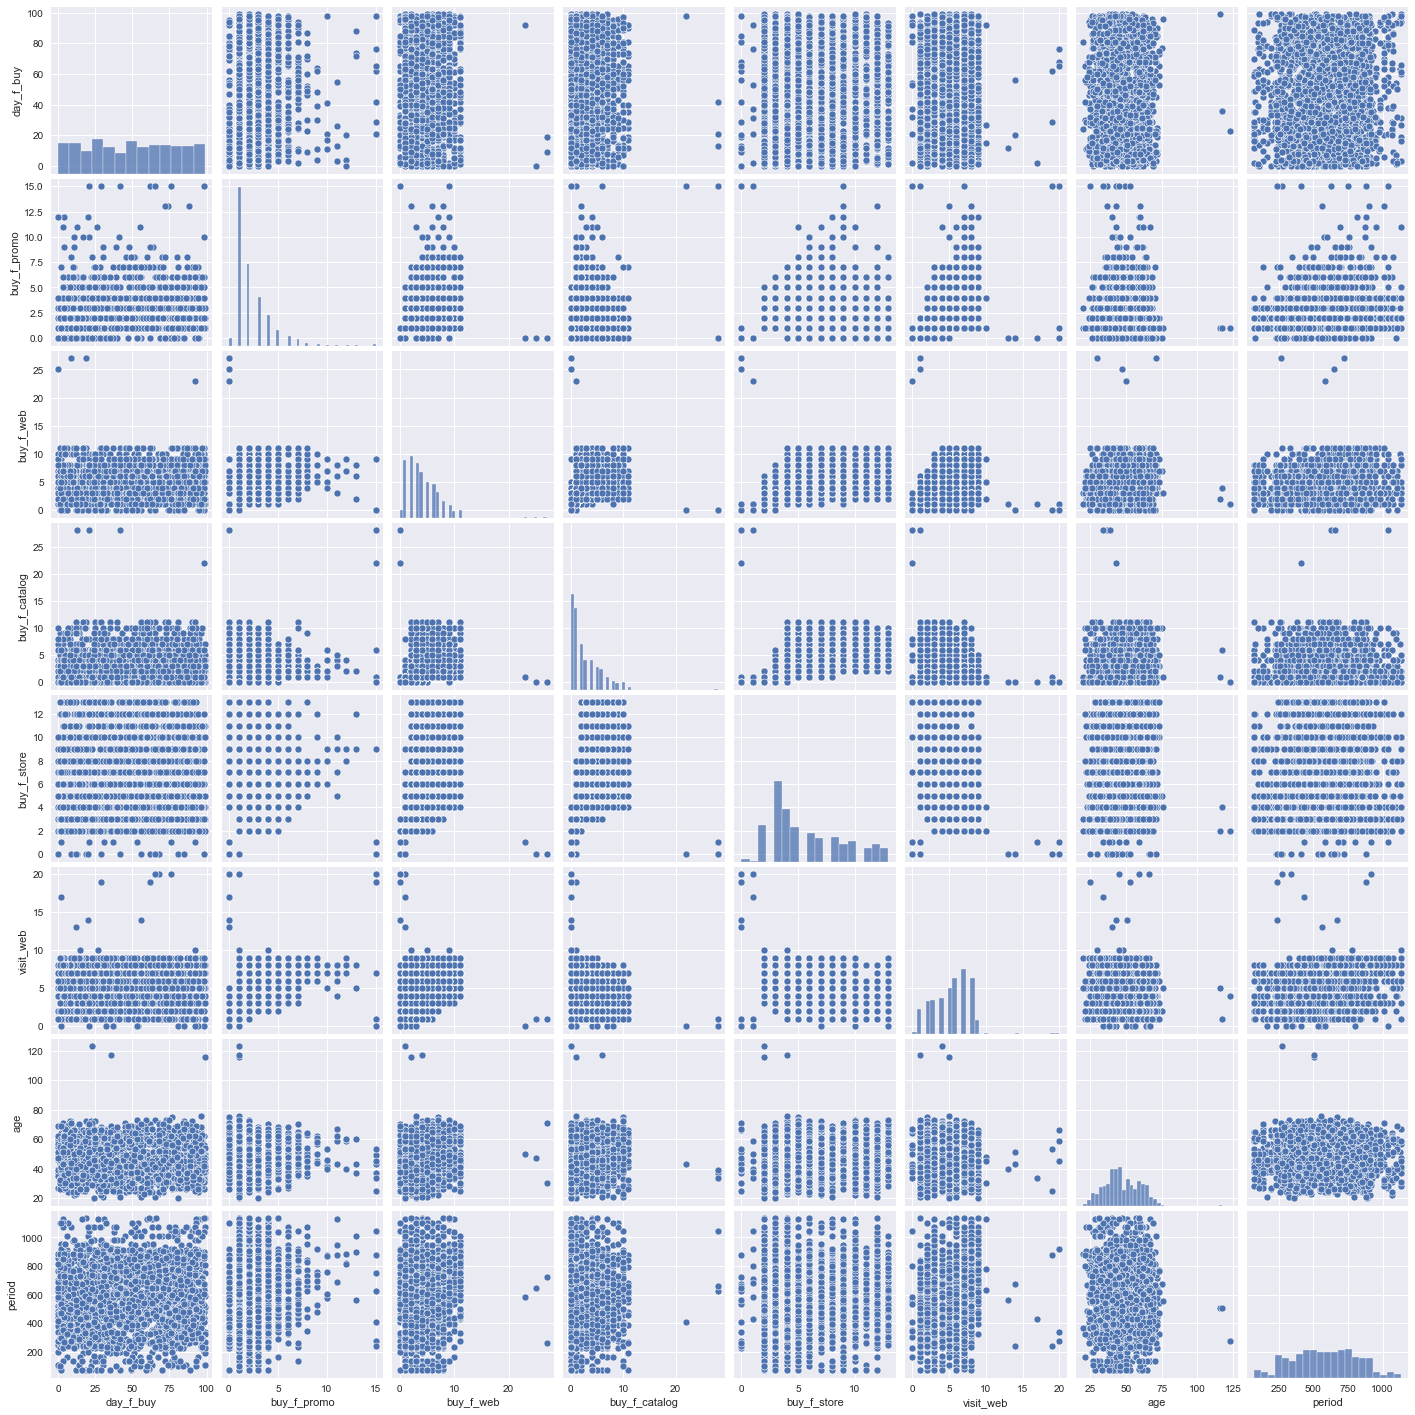

In [18]:
sns.pairplot(data=pairs_df);

대부분의 데이터에 튀는 값들이 있지만 구매 관련 컬럼들의 경우 그 값 자체로 의미있는 정보를 담고 있을 확률이 큽니다. 따라서 그것을 제외하고 age, period 컬럼을 봤을 때, period는 정규분포와 유사한 형태로 잘 정돈되어 있으나 age 컬럼은 이상치가 정보량을 줄이고 있는 것을 볼 수 있습니다. 

또한 그 이상치가 100을 넘는 것으로 볼 때 상싱적으로 의심을 품을 만 한 데이터로 보입니다. 일반적이지 않은 데이터이므로 해당 컬럼만 다시 시각화를 통해 확인해보겠습니다.

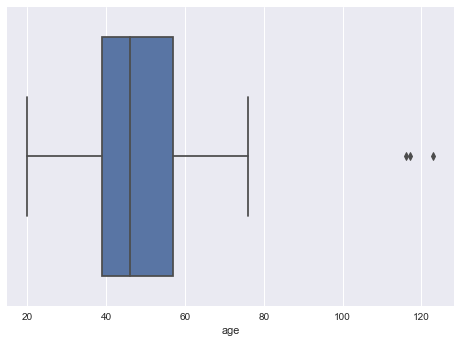

In [19]:
sns.boxplot(data=customer_df, x='age');

age가 120 근처에 있는 것은 이상합니다. 해당 고객들을 데이터를 살펴보겠습니다.

In [20]:
customer_df[customer_df['age']>100]

,id,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6,age,period
192,7829,99,1,2,1,2,5,0,0,0,0,0,1,0,116,507
239,11004,23,1,1,0,2,4,0,0,0,0,0,0,0,123,274
339,1150,36,1,4,6,4,1,0,0,1,0,0,0,0,117,507


나이 정보를 제외하고 나머지 컬럼들로 상관성을 분석해서 가장 상관성이 높은 다섯 고객의 나이 평균을 해당 고객의 나이로 지정해줄 것입니다. 물론 100% 일치할 수는 없겠지만 컬럼을 제거하는 것보다 정보 손실을 줄일 수 있습니다.

In [21]:
# id 컬럼을 제거하고 고객 리스트를 컬럼으로 전치한 다음 각 고객별로 상관도 테이블을 만든다.
corr_df = customer_df.drop('id', axis=1).T.corr()

# 상관도 테이블에서 나이가 110세 이상으로 표기된 고객 3명의 상관도 리스트를 추출한다. 
age_outliers_df = corr_df[customer_df[customer_df['age']>100].index]
age_outliers_df

,192,239,339
0,0.977110,0.929072,0.984905
1,0.996395,0.985838,0.989961
2,0.981023,0.941784,0.990341
3,0.999108,0.971865,0.992261
4,0.988590,0.924792,0.974089
...,...,...,...
2235,0.982841,0.937229,0.988486
2236,0.949149,0.953366,0.920994
2237,0.988644,0.925626,0.974716
2238,0.982029,0.959088,0.995677


In [22]:
# 고객별로 상관도가 높은 순으로 정렬한 다음 각각 5명의 인덱스를 추출한다.
age_outliers_corr_dict = {}

for col in age_outliers_df.columns:
    # 정렬했을 때 첫번째 값은 자기 자신의 인덱스이므로(상관성 100%) 2번째 값부터 5개를 가져온다.
    age_outliers_corr_dict[col] = list(age_outliers_df[col].sort_values(ascending=False).index[1:6])

print(age_outliers_corr_dict)

{192: [74, 923, 1380, 2052, 458], 239: [635, 1420, 1848, 66, 1468], 339: [1158, 2023, 1232, 1184, 920]}


이제 해당 고객들의 기존 age데이터를 예측한 나이로 바꿔주고 어떤 데이터(나이)로 교체되었는지 출력도 해봅니다.

In [221]:
for key, val in age_outliers_corr_dict.items():
    pred_age = int(customer_df.iloc[age_outliers_corr_dict[key]]['age'].mean())
    customer_df.iloc[key]['age'] = pred_age
    print('index {}번 고객의 수정된 나이(추정) : {}'.format(key, pred_age))

index 192번 고객의 수정된 나이(추정) : 62
index 239번 고객의 수정된 나이(추정) : 52
index 339번 고객의 수정된 나이(추정) : 52


마지막으로 수정한 age 컬럼 분포를 시각화합니다.

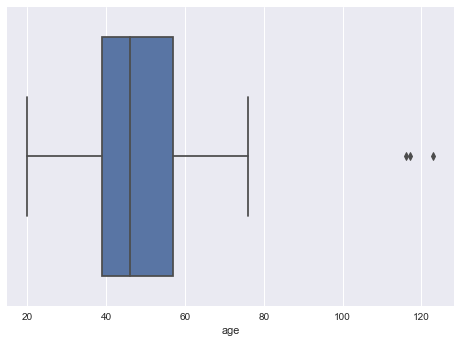

In [23]:
sns.boxplot(data=customer_df, x='age');

이상치가 정상적으로 처리되었네요. 지금까지 전처리한 데이터를 다시 펼쳐보면 아래와 같습니다.

In [223]:
customer_df

,id,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6,age,period
0,5524,58,3,8,10,4,7,0,0,0,0,0,0,1,59,1042
1,2174,38,2,1,1,2,5,0,0,0,0,0,0,0,62,196
2,4141,26,1,8,2,10,4,0,0,0,0,0,0,0,51,543
3,6182,26,2,2,0,4,6,0,0,0,0,0,0,0,32,136
4,5324,94,5,5,3,6,5,0,0,0,0,0,0,0,35,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,2,9,3,4,5,0,0,0,0,0,0,0,49,612
2236,4001,56,7,8,2,5,7,0,0,0,1,0,0,0,70,132
2237,7270,91,1,2,3,13,6,0,1,0,0,0,0,0,35,386
2238,8235,8,2,6,5,10,3,0,0,0,0,0,0,0,60,387


결측치와 데이터 분포도 다시 한번 확인해줍니다.

In [24]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             2240 non-null   int64
 1   day_f_buy      2240 non-null   int64
 2   buy_f_promo    2240 non-null   int64
 3   buy_f_web      2240 non-null   int64
 4   buy_f_catalog  2240 non-null   int64
 5   buy_f_store    2240 non-null   int64
 6   visit_web      2240 non-null   int64
 7   promo3         2240 non-null   int64
 8   promo4         2240 non-null   int64
 9   promo5         2240 non-null   int64
 10  promo1         2240 non-null   int64
 11  promo2         2240 non-null   int64
 12  complain       2240 non-null   int64
 13  promo6         2240 non-null   int64
 14  age            2240 non-null   int64
 15  period         2240 non-null   int64
dtypes: int64(16)
memory usage: 280.1 KB


In [25]:
customer_df.describe()

,id,day_f_buy,buy_f_promo,buy_f_web,buy_f_catalog,buy_f_store,visit_web,promo3,promo4,promo5,promo1,promo2,complain,promo6,age,period
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,47.194196,583.043304
std,3246.662198,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,232.229893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,71.000000
25%,2828.250000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,411.750000
50%,5458.500000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,584.000000
75%,8427.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,756.250000
max,11191.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,1134.000000


이상 없는 것을 확인하여 이 데이터셋을 저장하고 다음 장(Step2~)에서 그대로 활용합니다. 다음 장에서는 머신러닝을 활용해 군집 분석을 실시하고 고객 그룹을 다양한 유형으로 나눠볼 예정입니다.

In [228]:
customer_df.to_csv('./data/customer.csv', index=None)